In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Algorithm/datasets/UD_feature.csv')
print(df.shape)

df.head(10)

(585852, 23)


,login_cnt,reg_os,reg_country,reg_platform,max_lv,get_gem,use_gem,get_gamemoney,use_gamemoney,get_ruby,...,raid_start_cnt,raid_finish_cnt,defense_finish_cnt,chaos_dungeon_finish_cnt,alchemy_start_cnt,alchemy_reward_cnt,void_slit_start_cnt,void_slit_finish_cnt,guild_subjugate_point,pu
0,1,IOS,KR,Google,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,IOS,KR,Google,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,IOS,CN,Apple,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,IOS,KR,Apple,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,IOS,CN,Apple,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,IOS,KR,Apple,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,IOS,KR,Apple,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,IOS,KR,Apple,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3,IOS,CN,Apple,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,IOS,KR,Google,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.isnull().sum())

df = df.dropna(axis=0)
print("---"*10)
print(df.isnull().sum())

login_cnt                   0
reg_os                      0
reg_country                 0
reg_platform                0
max_lv                      0
get_gem                     0
use_gem                     0
get_gamemoney               0
use_gamemoney               0
get_ruby                    0
use_ruby                    0
use_merit                   0
get_courage                 0
raid_start_cnt              0
raid_finish_cnt             0
defense_finish_cnt          0
chaos_dungeon_finish_cnt    0
alchemy_start_cnt           0
alchemy_reward_cnt          0
void_slit_start_cnt         0
void_slit_finish_cnt        0
guild_subjugate_point       0
pu                          0
dtype: int64
------------------------------
login_cnt                   0
reg_os                      0
reg_country                 0
reg_platform                0
max_lv                      0
get_gem                     0
use_gem                     0
get_gamemoney               0
use_gamemoney             

0    518658
1     31538
Name: pu, dtype: int64


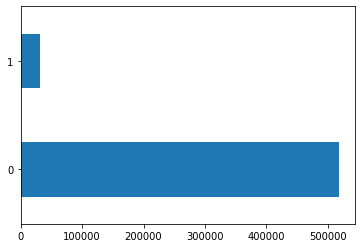

In [ ]:
print(df['pu'].value_counts())
df['pu'].value_counts().plot(kind='barh')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score

a = encoder.fit_transform(df)
df_encode = pd.DataFrame(a, columns=df.columns)


x = df_encode.iloc[:, :-1]
y = df_encode[['pu']]

print(x.shape, y.shape)

(550196, 22) (550196, 1)


In [ ]:
compared_df = pd.concat([df, df_encode], axis=1)
compared_df.head(10)

,login_cnt,reg_os,reg_country,reg_platform,max_lv,get_gem,use_gem,get_gamemoney,use_gamemoney,get_ruby,...,raid_start_cnt,raid_finish_cnt,defense_finish_cnt,chaos_dungeon_finish_cnt,alchemy_start_cnt,alchemy_reward_cnt,void_slit_start_cnt,void_slit_finish_cnt,guild_subjugate_point,pu
0,1.0,IOS,KR,Google,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,IOS,KR,Google,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,IOS,CN,Apple,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,IOS,KR,Apple,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,IOS,CN,Apple,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,IOS,KR,Apple,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,IOS,KR,Apple,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,IOS,KR,Apple,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,IOS,CN,Apple,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,IOS,KR,Google,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9095)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(440156, 22) (110040, 22) (440156, 1) (110040, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=9095)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_smote.shape, y_train_smote.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', y_train_smote.value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (440156, 22) (440156, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (829804, 22) (829804, 1)
SMOTE 적용 후 레이블 값 분포: 
 pu 
0.0    414902
1.0    414902
dtype: int64


In [ ]:
# x_train_smote.to_excel('x_train_smote.xlsx')

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# xgb = XGBClassifier()

# xgb_param_grid = {
#     'n_estimators': np.arange(100, 600, 100),
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [1,2,4,6],
# }

# xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring='roc_auc', n_jobs = -1)
# xgb_grid.fit(x_train_smote, y_train_smote)

# # 데이터가 너무 많으므로.. 학습 생략

In [ ]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=6)
evals = [(x_test, y_test)]

xgb.fit(x_train_smote, y_train_smote, early_stopping_rounds=100, eval_metric='auc', eval_set=evals)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.94942
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.949353
[2]	validation_0-auc:0.949317
[3]	validation_0-auc:0.949353
[4]	validation_0-auc:0.949332
[5]	validation_0-auc:0.950307
[6]	validation_0-auc:0.950452
[7]	validation_0-auc:0.950477
[8]	validation_0-auc:0.950714
[9]	validation_0-auc:0.950731
[10]	validation_0-auc:0.95083
[11]	validation_0-auc:0.950882
[12]	validation_0-auc:0.950741
[13]	validation_0-auc:0.950906
[14]	validation_0-auc:0.950886
[15]	validation_0-auc:0.951036
[16]	validation_0-auc:0.950963
[17]	validation_0-auc:0.950967
[18]	validation_0-auc:0.951136
[19]	validation_0-auc:0.951114
[20]	validation_0-auc:0.951158
[21]	validation_0-auc:0.951283
[22]	validation_0-auc:0.951323
[23]	validation_0-auc:0.951372
[24]	validation_0-auc:0.951383
[25]	validation_0-auc:0.951434
[26]	validation_0-auc:0.951527
[27]	validation_0-auc:0.951462
[28]	validation_0-auc:0.951504
[29]	validation_0-auc:0.951523
[30]	validation_0

XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=500)

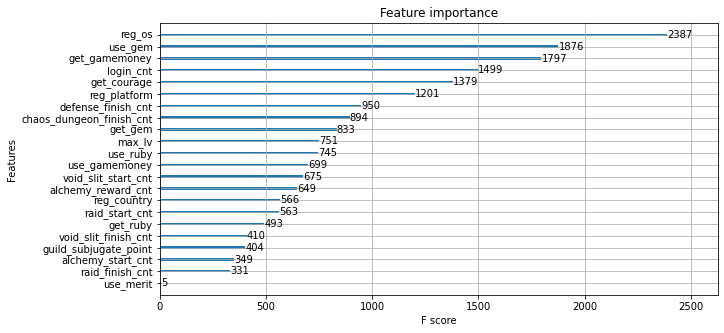

In [ ]:
from xgboost import plot_importance
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10,5
plot_importance(xgb)

In [ ]:
try:
    import shap
except:
    !pip install shap
    import shap

# random value
idx = 13

print(x_train_smote.iloc[idx, :])
shap.initjs()

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_train_smote)

shap.force_plot(explainer.expect_value,
                shap_values[idx, :],
                x_train_smote[idx, :])

login_cnt                        5.0
reg_os                           1.0
reg_country                     56.0
reg_platform                     1.0
max_lv                          92.0
get_gem                          0.0
use_gem                          0.0
get_gamemoney               135441.0
use_gamemoney                34826.0
get_ruby                         0.0
use_ruby                         0.0
use_merit                        0.0
get_courage                   2728.0
raid_start_cnt                   0.0
raid_finish_cnt                  0.0
defense_finish_cnt               2.0
chaos_dungeon_finish_cnt         3.0
alchemy_start_cnt                2.0
alchemy_reward_cnt               3.0
void_slit_start_cnt              0.0
void_slit_finish_cnt             0.0
guild_subjugate_point         1180.0
Name: 13, dtype: float64


KeyboardInterrupt: ignored